<a href="https://colab.research.google.com/github/jaekyoungkim/floor_DL/blob/main/%EB%B0%91%EB%B0%94%EB%8B%A5%EB%B6%80%ED%84%B0%EC%8B%9C%EC%9E%91%ED%95%98%EB%8A%94%EB%94%A5%EB%9F%AC%EB%8B%9D2_(ch7_8).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/aaajeong/Deep-Learning-from-Scratch-2.git

fatal: destination path 'Deep-Learning-from-Scratch-2' already exists and is not an empty directory.


In [2]:
!git clone https://github.com/WegraLee/deep-learning-from-scratch-2.git

Cloning into 'deep-learning-from-scratch-2'...
remote: Enumerating objects: 606, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 606 (delta 1), reused 5 (delta 0), pack-reused 598
Receiving objects: 100% (606/606), 29.82 MiB | 38.99 MiB/s, done.
Resolving deltas: 100% (361/361), done.


# ch7. RNN을 사용한 문장생성 

In [ ]:
# 언어모델을 사용해 문장생성을 수행
import sys
sys.path.append('/content/Deep-Learning-from-Scratch-2/')

from common.functions import softmax 
from ch06.rnnlm import Rnnlm
from ch06.better_rnnlm import BetterRnnlm 


In [ ]:
class RnnlmGen(Rnnlm): 
  def generate(self, start_id ,skip_ids = None , sample_size =100): #문장생성 수행
  # start_ids : 최초로 주는 단어의 id / sample_size는 샘플링하는 단어의 수
  # skip_ids : 이 리스트에 속하는 단어id는 샘플링하지 않음 ex) UNK, N등  
    word_ids = [start_id] 
    x=start_id 
    while len(word_ids) < sample_size: 
      x= np.array(x).reshape(1,1)  # predict메서드는 미니배치 처리를 하므로, x는 2차원 배열/ 단어 id를 하나만 입력하더락도 미니배치 크기를 1로 간주해 1x1 넘파이 배열로 reshape 한다
      score = self.predict(x) # MODEL.predict 를 호출해 각 단어의 점수를 출력(점수는 정규화 되기전의 값)
      p= softmax(score.flatten())  
      
      sampled = np.random.choice(len(p), p=p) 
      if (skip_ids is None) or (sampled not in skip_ids): 
        x=sampled 
        word_ids.append(int(x)) 
    return word_ids 

In [ ]:
from ch07.rnnlm_gen import RnnlmGen
from dataset import ptb 
corpus, word_to_id, id_to_word = ptb.load_data('train') 
vocab_size = len(word_to_id) 
corpus_size = len(corpus) 

In [ ]:
vocab_size # 10000 등록된 글자수(중복제거)

10000

In [ ]:
corpus_size # 929589 전체글자수

929589

In [ ]:
model = RnnlmGen() 
start_word = 'you'
start_id = word_to_id[start_word] ; start_id # 316

316

In [ ]:
skip_words = ['N','<unk>', '$']
skip_ids = [word_to_id[w] for w in skip_words] ;skip_ids

[27, 26, 416]

In [ ]:
# 문장생성
word_ids = model.generate(start_id, skip_ids) 
txt = ' '.join([id_to_word[i] for i in word_ids]) 
txt = txt.replace(' <eos>', '\n') 
print(txt)

sampled :  [7119]
sampled :  [9917]
sampled :  [7326]
sampled :  [5582]
sampled :  [6200]
sampled :  [168]
sampled :  [5285]
sampled :  [9025]
sampled :  [5239]
sampled :  [9170]
sampled :  [9644]
sampled :  [3806]
sampled :  [4015]
sampled :  [5334]
sampled :  [6788]
sampled :  [2369]
sampled :  [4256]
sampled :  [7637]
sampled :  [7062]
sampled :  [1226]
sampled :  [7417]
sampled :  [7184]
sampled :  [987]
sampled :  [4237]
sampled :  [2584]
sampled :  [8112]
sampled :  [3498]
sampled :  [308]
sampled :  [4844]
sampled :  [2081]
sampled :  [1515]
sampled :  [5108]
sampled :  [3339]
sampled :  [7093]
sampled :  [9733]
sampled :  [2370]
sampled :  [4458]
sampled :  [1743]
sampled :  [1461]
sampled :  [413]
sampled :  [5375]
sampled :  [7830]
sampled :  [2195]
sampled :  [3582]
sampled :  [5601]
sampled :  [9452]
sampled :  [9025]
sampled :  [8091]
sampled :  [5162]
sampled :  [6887]
sampled :  [5981]
sampled :  [4984]
sampled :  [3399]
sampled :  [1164]
sampled :  [7905]
sampled :  [78

In [ ]:
# 위의 결과는 말이 안되는 문장임
# 학습한 결과를 적용해보려함
model.load_params('/content/Deep-Learning-from-Scratch-2/ch06/Rnnlm.pkl')
# 문장생성
word_ids = model.generate(start_id, skip_ids) 
txt = ' '.join([id_to_word[i] for i in word_ids]) 
txt = txt.replace(' <eos>', '\n') 
print(txt)

sampled :  [8252]
sampled :  [7013]
sampled :  [5012]
sampled :  [7512]
sampled :  [9650]
sampled :  [5835]
sampled :  [6784]
sampled :  [9859]
sampled :  [613]
sampled :  [1457]
sampled :  [2290]
sampled :  [9732]
sampled :  [429]
sampled :  [9994]
sampled :  [3478]
sampled :  [5556]
sampled :  [1158]
sampled :  [9166]
sampled :  [9164]
sampled :  [1848]
sampled :  [7697]
sampled :  [3994]
sampled :  [6588]
sampled :  [5586]
sampled :  [1795]
sampled :  [737]
sampled :  [4566]
sampled :  [5419]
sampled :  [9990]
sampled :  [4139]
sampled :  [819]
sampled :  [8921]
sampled :  [8663]
sampled :  [6599]
sampled :  [1633]
sampled :  [3896]
sampled :  [907]
sampled :  [6438]
sampled :  [740]
sampled :  [9358]
sampled :  [1551]
sampled :  [9030]
sampled :  [1501]
sampled :  [7736]
sampled :  [3551]
sampled :  [7776]
sampled :  [3906]
sampled :  [7361]
sampled :  [142]
sampled :  [680]
sampled :  [4620]
sampled :  [9546]
sampled :  [8930]
sampled :  [5416]
sampled :  [9625]
sampled :  [8001]


In [ ]:
# 이전보다는 좋아졌지만 아직도 완벽한 문장은 아님 -> 더 좋은 문장을 만들기위해 정교한 모델이 필요함
# coding: utf-8
import sys
from common.np import *
from ch07.rnnlm_gen import BetterRnnlmGen
from dataset import ptb

model = BetterRnnlmGen()
model.load_params('/content/Deep-Learning-from-Scratch-2/ch06/BetterRnnlm.pkl')

# start 문자와 skip 문자 설정
start_word = 'you'
start_id = word_to_id[start_word]
skip_words = ['N', '<unk>', '$']
skip_ids = [word_to_id[w] for w in skip_words]
# 문장 생성
word_ids = model.generate(start_id, skip_ids)
txt = ' '.join([id_to_word[i] for i in word_ids])
txt = txt.replace(' <eos>', '.\n')

print(txt) # 훨씬 깨끗한 문장이 생성됨


you operates the best three other peasants on this new york nomura to discuss.
 what such programs of them sometimes turn into.
 this impact wo n't be revised if an interpretation of the negotiations is limited to the supreme court and the united states ' investment committees not to protect the responsibility transfers of principal accounting but ftc people is destroying their burdens and leave them as cheap.
 nevertheless mr. nixon was such as winning his fellow husband he has been on free say.
 i am non-violent about this is the problem of a society and


In [ ]:
model.reset_state() # reset

start_words = 'the meaning of life is'
start_ids = [word_to_id[w] for w in start_words.split(' ')] ; start_ids


[32, 4748, 42, 2262, 40]

In [ ]:
for x in start_ids[:-1]:
    x = np.array(x).reshape(1, 1)
    model.predict(x)

word_ids = model.generate(start_ids[-1], skip_ids)
word_ids = start_ids[:-1] + word_ids
print(word_ids)

[32, 4748, 42, 2262, 40, 93, 495, 159, 566, 377, 35, 2079, 1275, 853, 24, 39, 7747, 69, 552, 189, 2042, 133, 32, 1136, 229, 3523, 42, 714, 48, 2702, 24, 417, 32, 2720, 28, 32, 3187, 54, 8490, 152, 4688, 3347, 24, 6945, 163, 5769, 312, 48, 863, 553, 864, 42, 32, 2069, 42, 2665, 108, 101, 934, 48, 7244, 1714, 3174, 40, 41, 48, 863, 553, 42, 7438, 48, 6429, 64, 49, 3869, 5578, 1714, 1155, 24, 4021, 46, 54, 55, 553, 311, 312, 48, 863, 873, 864, 160, 458, 3475, 1624, 42, 3454, 42, 56, 114, 24, 32, 237, 1624, 227]


In [ ]:
txt = ' '.join([id_to_word[i] for i in word_ids])
txt = txt.replace(' <eos>', '.\n')
print('-' * 50)
print(txt)

--------------------------------------------------
the meaning of life is that people are not relatively a man she says.
 mr. seidman has been company talk about the filing by violations of labor and assistance.
 during the coming years the panel was refusing on passing letters.
 giovanni a. dover president and chief executive officer of the degree of land in new york and walter e. sullivan is chairman and chief executive of naval and agreements to former sen. raymond e. age.
 richmond group was named executive vice president and chief operating officer at first manhattan bank of dallas of this year.
 the u.s. bank which


In [ ]:
# seq2seq 모델
# 2개의 RNN을 연결한 모델
# Encoder-Decoder 모델 (부호화 - 복호화)
# Encoder는 문장을 고정길이 벡터로 변환
# Decoder : 앞에서 나온 생성 모델을 떠올릴수있음

In [ ]:
# 가변길이 시계열 데이터 : 패딩으로 길이 고정시킴 
# 남는 공간에는 의미없는 데이터(공백)으로 채움


In [ ]:
# data : dataset/addition.txt 
# 덧셈예 50000개
from dataset import sequence 
(x_train, t_train) , (x_test,t_test) = sequence.load_data('addition.txt', seed=1984) 
char_to_id , id_to_char = sequence.get_vocab() 
char_to_id

{' ': 5,
 '+': 2,
 '0': 9,
 '1': 0,
 '2': 8,
 '3': 10,
 '4': 12,
 '5': 4,
 '6': 1,
 '7': 3,
 '8': 11,
 '9': 7,
 '_': 6}

In [ ]:
id_to_char

{0: '1',
 1: '6',
 2: '+',
 3: '7',
 4: '5',
 5: ' ',
 6: '_',
 7: '9',
 8: '2',
 9: '0',
 10: '3',
 11: '8',
 12: '4'}

In [ ]:
print(x_train.shape, t_train.shape)

(45000, 7) (45000, 5)


In [ ]:
print(x_test.shape, t_test.shape)

(5000, 7) (5000, 5)


In [ ]:
print(x_train[0]) 
print(t_train[0])

[ 3  0  2  0  0 11  5]
[ 6  0 11  7  5]


In [ ]:
print(''.join([id_to_char[c] for c in x_train[0]]))
print(''.join([id_to_char[c] for c in t_train[0]]))

71+118 
_189 


In [ ]:
class Encoder:
  def __init__(self, vocab_size, wordvec_size, hidden_size):
    V,D,H = vocab_size, wordvec_size, hidden_size 
    rn = np.random.randn 

    embed_W = (rn(V,D) /100).astype('f') 
    lstm_Wx = (rn(D,4*H) / np.sqrt(D)).astype('f') 
    lstm_Wh = (rn(H,4*H) /np.sqrt(D)).astype('f') 
    lstm_b = np.zeros(4*H).astype('f')

    self.embed = TimeEmbedding(embed_W) 
    self.lstm = TimeLSTM(lstm_Wx, lstm_Wh, lstm_b , stateful = False)  # timelstm 계층이 상태를 유지하지 않음

    self.params = self.embed.params + self.lstm.params 
    self.grads = self.embed.grads + self.lstm.grads
    self.hs = None

  def forward(self, xs): 
    xs = self.embed.forward(xs) 
    hs = self.lstm.forward(xs)
    self.hs = hs 
    return hs[:,-1,:] 
  
  def backward(self, dh):
    dhs = np.zeros_like(self.hs) 
    dhs[:,-1,:] = dh 
    dout = self.lstm.backward(dhs) 
    dout = self.embed.backward(dout) 
    return dout 
  


In [ ]:
class Decoder:
  def __init__(self, vocab_size, wordvec_size, hidden_size):
    V,D,H = vocab_size, wordvec_size, hidden_size  # vocab_size 는 문자수 여기서는 13이됨
    rn = np.random.randn 

    embed_W = (rn(V,D) /100).astype('f') 
    lstm_Wx = (rn(D,4*H) / np.sqrt(D)).astype('f') 
    lstm_Wh = (rn(H,4*H) /np.sqrt(D)).astype('f') 
    lstm_b = np.zeros(4*H).astype('f')  
    affine_W = (rn(H,V) / np.sqrt(H)).astype('f')
    affine_b = np.zeors_like(V).astype('f') 


    self.embed = TimeEmbedding(embed_W) 
    self.lstm = TimeLSTM(lstm_Wx, lstm_Wh, lstm_b , stateful = False)  # timelstm 계층이 상태를 유지하지 않음
    self.affine = TimeAffine(affine_W, affine_b) 

    self.params , self.grads = [],[]
    for layer in (self.embed, self.lstm, self.affine): 
      self.params += layer.params 
      self.grads += layer.grads 
  
  def forward(self, xs, h):
    self.lstm.set_state(h)  # encoder의 h가 들어감
 
    out = self.embed.forward(xs) # embedding
    out = self.lstm.forward(out)  # lstm
    score = self.affine.forward(out) # affine
    return score 
  
  def backward(self, dscore): # forward의 역으로 backpropagation
    dout = self.affine.backward(dscore) 
    dout = self.lstm.backward(dout)
    dout = self.embed.backward(dout)
    dh = self.lstm.dh # lstm의 기울기를 dh에 할당함
    return dh

  def generate(self, h, start_id, sample_size): 
    sampled = []
    sample_id = start_id 
    self.lstm.set_state(h) 

    for _ in range(sample_size):
      x = np.array(sample_id).reshape((1,1))
      out = self.embed.forward(x)
      out = self.lstm.forward(out)
      score = self.affine.forward(out)

      sample_id = np.argmax(score.flatten())
      sampled.append(int(sample_id))
    return sampled

In [ ]:
# seq2seq class: encoder와 decoder를 연결하고, timesoftmax with loss 계층을 이용해 손실을 계산
from common.time_layers import *
from common.base_model import BaseModel

class Seq2seq(BaseModel):
  def __init__(self, vocab_size, wordvec_size, hidden_size):
    V,D,H = vocab_size, wordvec_size, hidden_size  # vocab_size 는 문자수 여기서는 13이됨
    self.encoder = Encoder(V,D,H)
    self.decoder = Decoder(V,D,H) 
    self.softmax = TimeSoftaxWithLoss()

    self.params = self.encoder.params + self.decoder.params 
    self.grads = self.encoder.grads + self.decoder.grads 

  def forward(self, xs, ts):
    decodr_xs , decoder_ts = ts[:,:-1] , ts[:,1:] 
    h= self.encdoer.forward(xs)
    score = self.decoder.forward(decoder_xs,h) 
    loss = self.softmax.forward(score, decoder_ts) 
    return loss 
  
  def backward(self,dout=1):
    dout= self.softmax.backward(dout)
    dh = self.decoder.backward(dout)
    dout = self.encoder.backward(dh) 
    return dout 
  
  def generate(self, xs, start_id, sample_size): 
    h = self.encoder.forward(xs) 
    sampled = self.decoder.generate(h, start_id, sample_size) 
    return sampled 

In [ ]:
 # seq2seq 평가 : 학습데이터에서 미니배치를 선택 >  미니배치로부터 기울기 계산 > 기울기 사용하여 매개변수를 갱신
import numpy as np
import matplotlib.pyplot as plt 
from dataset import sequence 
from common.optimizer import Adam 
from common.trainer import Trainer 
from common.util import eval_seq2seq
from ch07.seq2seq import Seq2seq
from ch07.peeky_seq2seq import *


In [ ]:
(x_train, t_train), (x_test,t_test) = sequence.load_data('addition.txt') 
char_to_id , id_to_char = sequence.get_vocab()

In [ ]:
char_to_id

{' ': 5,
 '+': 2,
 '0': 9,
 '1': 0,
 '2': 8,
 '3': 10,
 '4': 12,
 '5': 4,
 '6': 1,
 '7': 3,
 '8': 11,
 '9': 7,
 '_': 6}

In [ ]:
x_train

array([[ 3,  0,  2, ...,  0, 11,  5],
       [ 4,  0,  9, ...,  8,  8, 10],
       [ 1,  1,  2, ...,  9,  0,  5],
       ...,
       [ 3,  1, 10, ...,  8,  0,  3],
       [ 1,  2,  8, ...,  0,  5,  5],
       [ 8,  2,  4, ..., 10,  5,  5]])

In [ ]:
x_train.shape

(45000, 7)

In [ ]:
# 하이퍼 파라미터 설정 
vocab_size = len(char_to_id); vocab_size # 13
wordvec_size = 16
hidden_size = 128
batch_size = 128
max_epoch = 25
max_grad = 5.0


In [ ]:
# 모델
model = Seq2seq(vocab_size,  wordvec_size,  hidden_size) 
optimizer = Adam()
trainer = Trainer(model, optimizer) 


In [ ]:
 t_test[[1]]

array([[ 6,  0,  0, 10,  7]])

In [ ]:
acc_list = []
for epoch in range(max_epoch):
  trainer.fit(x_train, t_train, max_epoch=1, batch_size =batch_size, max_grad = max_grad) 
  correct_num = 0 
  for i in  range(len(x_test)): 
    question, correct = x_test[[i]], t_test[[i]]
    verbose = i < 10
    correct_num += eval_seq2seq(model, question, correct, id_to_char, verbose) 
  acc = float(correct_num) / len(x_test)
  acc_list.append(acc)
  print(acc*100)

| 에폭 1 |  반복 1 / 351 | 시간 0[s] | 손실 2.56
| 에폭 1 |  반복 21 / 351 | 시간 1[s] | 손실 2.52
| 에폭 1 |  반복 41 / 351 | 시간 2[s] | 손실 2.14
| 에폭 1 |  반복 61 / 351 | 시간 2[s] | 손실 1.94
| 에폭 1 |  반복 81 / 351 | 시간 3[s] | 손실 1.90
| 에폭 1 |  반복 101 / 351 | 시간 4[s] | 손실 1.86
| 에폭 1 |  반복 121 / 351 | 시간 5[s] | 손실 1.85
| 에폭 1 |  반복 141 / 351 | 시간 6[s] | 손실 1.84
| 에폭 1 |  반복 161 / 351 | 시간 7[s] | 손실 1.83
| 에폭 1 |  반복 181 / 351 | 시간 8[s] | 손실 1.82
| 에폭 1 |  반복 201 / 351 | 시간 9[s] | 손실 1.78
| 에폭 1 |  반복 221 / 351 | 시간 10[s] | 손실 1.76
| 에폭 1 |  반복 241 / 351 | 시간 11[s] | 손실 1.76
| 에폭 1 |  반복 261 / 351 | 시간 12[s] | 손실 1.75
| 에폭 1 |  반복 281 / 351 | 시간 13[s] | 손실 1.74
| 에폭 1 |  반복 301 / 351 | 시간 14[s] | 손실 1.74
| 에폭 1 |  반복 321 / 351 | 시간 15[s] | 손실 1.73
| 에폭 1 |  반복 341 / 351 | 시간 16[s] | 손실 1.72
Q 77+85  
T 162 
☒ 102 
---
Q 975+164
T 1139
☒ 1027
---
Q 582+84 
T 666 
☒ 102 
---
Q 8+155  
T 163 
☒ 102 
---
Q 367+55 
T 422 
☒ 102 
---
Q 600+257
T 857 
☒ 1027
---
Q 761+292
T 1053
☒ 1027
---
Q 830+597
T 1427
☒ 1027
---
Q

In [ ]:
# seq2seq의 개선
# seq2seq를 세분화하여 속도를 개선하고자함
# 1. 입력데이터 반전 : 데이터의 순서를 반전시킴 5 7 + 5 _ _ _ -> _ _ _ 5 + 5 7
(x_train, t_train), (x_test,t_test) = sequence.load_data('addition.txt') 
x_train , x_test =x_train[:, ::-1], x_test[:,::-1] 

model = Seq2seq(vocab_size,  wordvec_size,  hidden_size) 
optimizer = Adam()
trainer = Trainer(model, optimizer) 

acc_list = []
for epoch in range(max_epoch):
  trainer.fit(x_train, t_train, max_epoch=1, batch_size =batch_size, max_grad = max_grad) 
  correct_num = 0 
  for i in  range(len(x_test)): 
    question, correct = x_test[[i]], t_test[[i]]
    verbose = i < 10
    correct_num += eval_seq2seq(model, question, correct, id_to_char, verbose) 
  acc = float(correct_num) / len(x_test)
  acc_list.append(acc)
  print(acc*100)

# 데이터를 반전시키는 효과는 어떤 문제를 다루느냐에 따라 다르지만, 대부분의 경우 더 좋은 결과로 이어짐
# 직관적으로는 기울기 전파가 원활해지기 떄문이라고 생각됨

| 에폭 1 |  반복 1 / 351 | 시간 0[s] | 손실 2.56
| 에폭 1 |  반복 21 / 351 | 시간 0[s] | 손실 2.52
| 에폭 1 |  반복 41 / 351 | 시간 1[s] | 손실 2.17
| 에폭 1 |  반복 61 / 351 | 시간 2[s] | 손실 1.96
| 에폭 1 |  반복 81 / 351 | 시간 3[s] | 손실 1.91
| 에폭 1 |  반복 101 / 351 | 시간 4[s] | 손실 1.87
| 에폭 1 |  반복 121 / 351 | 시간 5[s] | 손실 1.86
| 에폭 1 |  반복 141 / 351 | 시간 6[s] | 손실 1.84
| 에폭 1 |  반복 161 / 351 | 시간 7[s] | 손실 1.80
| 에폭 1 |  반복 181 / 351 | 시간 8[s] | 손실 1.78
| 에폭 1 |  반복 201 / 351 | 시간 9[s] | 손실 1.77
| 에폭 1 |  반복 221 / 351 | 시간 10[s] | 손실 1.77
| 에폭 1 |  반복 241 / 351 | 시간 11[s] | 손실 1.76
| 에폭 1 |  반복 261 / 351 | 시간 12[s] | 손실 1.75
| 에폭 1 |  반복 281 / 351 | 시간 12[s] | 손실 1.74
| 에폭 1 |  반복 301 / 351 | 시간 13[s] | 손실 1.74
| 에폭 1 |  반복 321 / 351 | 시간 14[s] | 손실 1.74
| 에폭 1 |  반복 341 / 351 | 시간 15[s] | 손실 1.73
Q   58+77
T 162 
☒ 100 
---
Q 461+579
T 1139
☒ 1000
---
Q  48+285
T 666 
☒ 1001
---
Q   551+8
T 163 
☒ 100 
---
Q  55+763
T 422 
☒ 1001
---
Q 752+006
T 857 
☒ 1000
---
Q 292+167
T 1053
☒ 1000
---
Q 795+038
T 1427
☒ 1000
---
Q

In [ ]:
# 2. peeky 
# 중요한 정보가 담긴 encoder 의 출력h 를 decoder의 다른계층에게도 전해주는것
# 모든 시각의 affine계층과 lstm계층에 h를 전달해줌
# 중요한 정보를 한 사람이 독점하는게 아니라 많은 사람과 공유한다면 더 올바른 결정을 내릴 가능성이 커짐(peeky decoder)
# ch07. peeky_seq2seq.py 참고


class PeekyDecoder:
    # 가중치 매개변수 초기화
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        rn = np.random.randn

        # peeky 를 사용하지 않은 디코더와의 차이점은
        # LSTM, Affine 계층의 가중치 형상
        embed_W = (rn(V, D) / 100).astype('f')
        # LSTM 입력 벡터 형상 : H -> H + D
        lstm_Wx = (rn(H + D, 4 * H) / np.sqrt(H + D)).astype('f')  # H+D 다름
        lstm_Wh = (rn(H, 4 * H) / np.sqrt(H)).astype('f')
        lstm_b = np.zeros(4 * H).astype('f')
        # Affine 입력 벡터 형상 : H -> H + H
        affine_W = (rn(H + H, V) / np.sqrt(H + H)).astype('f') # H+H 다름
        affine_b = np.zeros(V).astype('f')

        self.embed = TimeEmbedding(embed_W)
        self.lstm = TimeLSTM(lstm_Wx, lstm_Wh, lstm_b, stateful=True)
        self.affine = TimeAffine(affine_W, affine_b)

        self.params, self.grads = [], []
        for layer in (self.embed, self.lstm, self.affine):
            self.params += layer.params
            self.grads += layer.grads
        self.cache = None

    def forward(self, xs, h):
        N, T = xs.shape
        N, H = h.shape

        self.lstm.set_state(h)

        out = self.embed.forward(xs)
        # h 를 시계열만큼 복제해 hs 에 저장
        hs = np.repeat(h, T, axis=0).reshape(N, T, H) 
        # hs 와 embedding 계층의 출력을 연결 --> lstm에 입력
        out = np.concatenate((hs, out), axis=2)

        out = self.lstm.forward(out)
        out = np.concatenate((hs, out), axis=2)

        score = self.affine.forward(out)
        self.cache = H
        return score

    def backward(self, dscore):
        H = self.cache

        dout = self.affine.backward(dscore)
        dout, dhs0 = dout[:, :, H:], dout[:, :, :H]
        dout = self.lstm.backward(dout)
        dembed, dhs1 = dout[:, :, H:], dout[:, :, :H]
        self.embed.backward(dembed)

        dhs = dhs0 + dhs1
        dh = self.lstm.dh + np.sum(dhs, axis=1)
        return dh

    def generate(self, h, start_id, sample_size):
        sampled = []
        char_id = start_id
        self.lstm.set_state(h)

        H = h.shape[1]
        peeky_h = h.reshape(1, 1, H)
        for _ in range(sample_size):
            x = np.array([char_id]).reshape((1, 1))
            out = self.embed.forward(x)

            out = np.concatenate((peeky_h, out), axis=2)
            out = self.lstm.forward(out)
            out = np.concatenate((peeky_h, out), axis=2)
            score = self.affine.forward(out)

            char_id = np.argmax(score.flatten())
            sampled.append(char_id)

        return sampled


class PeekySeq2seq(Seq2seq):
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        self.encoder = Encoder(V, D, H)
        self.decoder = PeekyDecoder(V, D, H) # 기존 Decoder안쓰고 PeekyDecoder사용
        self.softmax = TimeSoftmaxWithLoss()

        self.params = self.encoder.params + self.decoder.params
        self.grads = self.encoder.grads + self.decoder.grads


In [ ]:
# peeky + reverse 둘다 적용하기
(x_train, t_train), (x_test,t_test) = sequence.load_data('addition.txt') 
x_train , x_test =x_train[:, ::-1], x_test[:,::-1] 

model = PeekySeq2seq(vocab_size,  wordvec_size,  hidden_size)  # peekyse2seq적용
optimizer = Adam()
trainer = Trainer(model, optimizer) 

acc_list = []
for epoch in range(max_epoch):
  trainer.fit(x_train, t_train, max_epoch=1, batch_size =batch_size, max_grad = max_grad) 
  correct_num = 0 
  for i in  range(len(x_test)): 
    question, correct = x_test[[i]], t_test[[i]]
    verbose = i < 10
    correct_num += eval_seq2seq(model, question, correct, id_to_char, verbose) 
  acc = float(correct_num) / len(x_test)
  acc_list.append(acc)
  print(acc*100)
# reverse와 peeky가 효과적으로 작동함을 알 수 있음
# reverse : 입력문장을 반전
# peeky : encoder의 정보르르 널리 퍼지게함


| 에폭 1 |  반복 1 / 351 | 시간 0[s] | 손실 2.57
| 에폭 1 |  반복 21 / 351 | 시간 1[s] | 손실 2.48
| 에폭 1 |  반복 41 / 351 | 시간 2[s] | 손실 2.20
| 에폭 1 |  반복 61 / 351 | 시간 3[s] | 손실 1.99
| 에폭 1 |  반복 81 / 351 | 시간 4[s] | 손실 1.89
| 에폭 1 |  반복 101 / 351 | 시간 5[s] | 손실 1.82
| 에폭 1 |  반복 121 / 351 | 시간 6[s] | 손실 1.82
| 에폭 1 |  반복 141 / 351 | 시간 7[s] | 손실 1.80
| 에폭 1 |  반복 161 / 351 | 시간 8[s] | 손실 1.79
| 에폭 1 |  반복 181 / 351 | 시간 9[s] | 손실 1.78
| 에폭 1 |  반복 201 / 351 | 시간 10[s] | 손실 1.77
| 에폭 1 |  반복 221 / 351 | 시간 11[s] | 손실 1.76
| 에폭 1 |  반복 241 / 351 | 시간 12[s] | 손실 1.76
| 에폭 1 |  반복 261 / 351 | 시간 13[s] | 손실 1.75
| 에폭 1 |  반복 281 / 351 | 시간 14[s] | 손실 1.74
| 에폭 1 |  반복 301 / 351 | 시간 15[s] | 손실 1.74
| 에폭 1 |  반복 321 / 351 | 시간 16[s] | 손실 1.73
| 에폭 1 |  반복 341 / 351 | 시간 17[s] | 손실 1.73
Q   58+77
T 162 
☒ 100 
---
Q 461+579
T 1139
☒ 1013
---
Q  48+285
T 666 
☒ 102 
---
Q   551+8
T 163 
☒ 100 
---
Q  55+763
T 422 
☒ 1023
---
Q 752+006
T 857 
☒ 1023
---
Q 292+167
T 1053
☒ 1023
---
Q 795+038
T 1427
☒ 1111
---


# ch08. 어텐션(attention) 

In [ ]:
# 어텐션의 구조
# 필요한 정보에만 집중할 수 있게 해줌
# 기존 seq2seq가 안고있던 문제도 해결해줌


In [ ]:
# seq2seq의 문제점
# encoder의 출력은 고정길이의 벡터였음, 고정길이라는데에 큰 문제가 잠재해 있음
# 고정길이 벡터라 함은 입력문장의 길이에 상관없이 항상 같은 길이의 벡터로 변환 - > 병목 현상


In [ ]:
import numpy as np
T,H = 5,4 
hs = np.random.randn(T,H) ;hs
# T :  시계열의 길이,  H :상태벡터의 원소수 
# 3

array([[-0.96358456, -1.54624244, -0.09042963,  1.17207577],
       [-0.689269  ,  0.22030184,  0.06901193, -0.26828323],
       [-1.90601328,  0.25872074,  0.17299159,  0.29025063],
       [-0.39938895, -0.37740789,  1.69052293, -0.53021857],
       [ 1.16609758, -0.70289808, -1.17007955,  0.75425395]])

In [ ]:
a = np.array([0.8,0.1,0.03,0.05, 0.02]) ; a

array([0.8 , 0.1 , 0.03, 0.05, 0.02])

In [ ]:
sum(a)

1.0

In [ ]:
ar = a.reshape(5,1).repeat(4,axis = 1) ;ar  # a 를 확장

array([[0.8 , 0.8 , 0.8 , 0.8 ],
       [0.1 , 0.1 , 0.1 , 0.1 ],
       [0.03, 0.03, 0.03, 0.03],
       [0.05, 0.05, 0.05, 0.05],
       [0.02, 0.02, 0.02, 0.02]])

In [ ]:
ar.shape

(5, 4)

In [ ]:
t= hs *ar ; t # 각행마다 a의 가중치가 곱해짐
# numpy의 브로드캐스트를 이용해서 위에서 ar을 따로 안구해도됨 


array([[-0.77086765, -1.23699395, -0.0723437 ,  0.93766061],
       [-0.0689269 ,  0.02203018,  0.00690119, -0.02682832],
       [-0.0571804 ,  0.00776162,  0.00518975,  0.00870752],
       [-0.01996945, -0.01887039,  0.08452615, -0.02651093],
       [ 0.02332195, -0.01405796, -0.02340159,  0.01508508]])

In [ ]:
t_ = hs * a.reshape(5,1) ; t # 위와 결과가 같음 reshape해서 2차원으로 맞춰주긴해야함

array([[-0.77086765, -1.23699395, -0.0723437 ,  0.93766061],
       [-0.0689269 ,  0.02203018,  0.00690119, -0.02682832],
       [-0.0571804 ,  0.00776162,  0.00518975,  0.00870752],
       [-0.01996945, -0.01887039,  0.08452615, -0.02651093],
       [ 0.02332195, -0.01405796, -0.02340159,  0.01508508]])

In [ ]:
print(t.shape)

(5, 4)


In [ ]:
c=  np.sum(t, axis =0) ; c # axis=0 (열), 열마다의 합을 구해줌  / 가중합

array([-8.93622441e-01, -1.24013050e+00,  8.71792903e-04,  9.08113959e-01])

In [ ]:
c.shape # 4개열

(4,)

In [ ]:
N,T,H = 10,5,4
hs = np.random.randn(N,T,H) 
a= np.random.randn(N,T) 
ar = a.reshape(N,T,1).repeat(H,axis=2) 

In [ ]:
a # 10행 5열

array([[ 0.10028369, -0.77149093, -0.33959723,  0.07313707, -1.01646888],
       [-0.45521592,  0.49487288, -0.96989542, -0.06342886,  0.61244644],
       [-0.24000429, -1.09864247,  1.16616468,  0.21743192,  0.77559782],
       [ 1.36113831,  0.69965856, -1.25277262,  0.31846643, -1.2012789 ],
       [ 0.00829961, -0.74240599, -0.94104858, -0.78259756, -1.50896818],
       [-2.30644048,  0.55349291, -0.59513318,  0.1615367 ,  1.94886734],
       [ 1.95811188,  0.43748924,  0.50484398,  0.84533451, -1.54929066],
       [ 0.43652241,  1.8260964 ,  0.92755227, -1.06251763,  0.92719063],
       [-0.22355431, -1.14592107, -0.68758507,  0.28422056, -0.97294445],
       [ 2.07000681,  0.88091501,  0.8348209 , -0.10424081, -0.63665744]])

In [ ]:
ar # 5행 4열이 10개만들어짐

array([[[ 0.10028369,  0.10028369,  0.10028369,  0.10028369],
        [-0.77149093, -0.77149093, -0.77149093, -0.77149093],
        [-0.33959723, -0.33959723, -0.33959723, -0.33959723],
        [ 0.07313707,  0.07313707,  0.07313707,  0.07313707],
        [-1.01646888, -1.01646888, -1.01646888, -1.01646888]],

       [[-0.45521592, -0.45521592, -0.45521592, -0.45521592],
        [ 0.49487288,  0.49487288,  0.49487288,  0.49487288],
        [-0.96989542, -0.96989542, -0.96989542, -0.96989542],
        [-0.06342886, -0.06342886, -0.06342886, -0.06342886],
        [ 0.61244644,  0.61244644,  0.61244644,  0.61244644]],

       [[-0.24000429, -0.24000429, -0.24000429, -0.24000429],
        [-1.09864247, -1.09864247, -1.09864247, -1.09864247],
        [ 1.16616468,  1.16616468,  1.16616468,  1.16616468],
        [ 0.21743192,  0.21743192,  0.21743192,  0.21743192],
        [ 0.77559782,  0.77559782,  0.77559782,  0.77559782]],

       [[ 1.36113831,  1.36113831,  1.36113831,  1.36113831],
  

In [ ]:
t= hs * ar ; t.shape # 10,5,4

(10, 5, 4)

In [ ]:
c= np.sum(t, axis = 1) # 10,5,4 의 5가 사라짐
c.shape

(10, 4)

In [ ]:
class WeightSum:
  def __init__(self):
    self.params , self.grads = [] , []
    self.cache = None 
  
  def forward(self, hs, a): 
    N,T,H = hs.shape

    ar = a.reshape(N,T,1).repeat(H, axis=2) 
    t= hs*ar 
    c=np.sum(t, axis=1)
    self.cache = (hs, ar) 
    return c

  def backward(self, dc):
    hs , ar = self.cache 
    N,T,H = hs.shape 
    dt = dc.reshape(N,1,H).repeat(T,axis=1)  # sum의 역전파
    dar = dt * hs 
    dhs = dt * ar 
    da = np.sum(dar, axis= 2) 
    return dhs, da

In [ ]:
# 각 단어의 중요도를 나타내는 가중치  a 
# 가중합을 이용해 맥락벡터를 얻을 수 있다
# a 를 구하는 방법 
import sys

sys.path.append('/content/Deep-Learning-from-Scratch-2')
from common.layers import Softmax 
import numpy as np
N,T,H = 10,5,4 # T:Term 5개, h:단어를 몇차원으로 나타낼지나타냄, 4차원, N : decodere에 들어간 입력이 10개

hs = np.random.randn(N, T, H) # hs 는 encoder의 hidden state를 모아놓은 집합체
h= np.random.randn(N, H)  # decoder 첫 input 에 대한  hidden layer 
hr = h.reshape(N,1,H).repeat(T, axis=1) 
t= hs*hr
print(t.shape)


(10, 5, 4)


In [ ]:
s= np.sum(t, axis=2)
print(s.shape)

(10, 5)


In [ ]:
softmax = Softmax()
a=softmax.forward(s) ;a

array([[3.02911766e-01, 1.30581841e-02, 4.96108542e-01, 4.41380158e-02,
        1.43783492e-01],
       [5.66748285e-02, 7.11153983e-02, 1.80110979e-01, 6.82404567e-01,
        9.69422806e-03],
       [2.91969433e-02, 6.90314089e-01, 4.51550024e-02, 2.34947683e-01,
        3.86282953e-04],
       [3.77739030e-02, 2.46257641e-02, 1.06876656e-01, 8.27997967e-01,
        2.72571005e-03],
       [4.20711977e-03, 1.92839161e-02, 4.39693385e-03, 7.37732973e-01,
        2.34379057e-01],
       [2.73435918e-02, 7.83119155e-01, 8.06552755e-04, 1.19031081e-01,
        6.96996193e-02],
       [1.80053011e-02, 2.24782370e-01, 2.98658992e-01, 1.30973901e-01,
        3.27579436e-01],
       [6.73851518e-02, 1.23660240e-03, 8.97830516e-01, 1.84113271e-04,
        3.33636163e-02],
       [5.45790364e-02, 2.66962056e-04, 2.34853270e-03, 9.04851826e-01,
        3.79536424e-02],
       [1.14586918e-01, 7.81892772e-01, 9.27721832e-02, 1.50691888e-04,
        1.05974340e-02]])

In [ ]:
a.shape # (10, 5) # decoder 10개에 대해서 각각의 attention을 나타내줌, 해당 attention을 T개 단어들에 대해서 단어 각각의 ATTENTION을 보여주고있음 

(10, 5)

In [ ]:
# 함수로 짜보기 attention weight

import sys 
from common.np import * 
from common.layers  import Softmax
class AttentionWeight:
  def __init__(self):
    self.params, self.grads = [], []
    self.softmax = Softmax()
    self.cache = None
     
  def forward(self, hs, h):
    N,T,H = hs.shape 
    hr = h.reshape(N,1,H).repeat(T,axis =1) 
    t= hs*hr 
    s= np.sum(t, axis=2) 
    a= self.softmax.forward(s)
    self.cache = (hs,hr) 
    return a 
  
  def backward(self, da): 
    hs,hr = self.cache 
    N,T,H = hs.shape 
    ds = self.softmax.backward(da) # input da가 들어감
    dt = ds.reshape(N,T,1).repeat(H,axis=2) 
    dhs = dt*hr
    dhr = dt*hs 
    dh = np.sum(dhr,axis=1)
    return dhs, dh 
  

In [ ]:
# attention weight + weight sum 두개의 layer로 구성됨
# attention weight :  encoder 가 출력하는 각 단어의 벡터 hs에 주목하여 해당단어의 가중치 a를 구함
# weight sum : a와  hs 의 가중합을 구하고 그 결과를 맥락 벡터 c로 출력함

class Attention:
  def __init__(self):
    self.params, self.grads = [], []
    self.attention.weight_layer = AttentionWeight()
    self.weight_sum_layer = WeightSum()
    self.attention_weight = None 

  def forward(self, hs, h):  #  hs 인코더를 통해 들어온 input / h : decoder로 들어오는 input 
    a= self.attention_weight_layer.forward(hs,h) # attention weight 첫번째 layer 
    out = self.weight_sum_layer.forward(hs, a) # weigth sum 두번째  layer 
  
  def backward(self, dout):
    dhs0, da = self.weight_sum_layer.backward(dout)
    dhs1, dh = self.attention
    dhs = dhs0 + dhs1 
    return dhs, dh 

# 해당 attention계층을  LSTM계층과 Affine 계층 사이에 삽입하면 됨


In [ ]:
class TimeAttention: 
  def __init__(self):
    self.params, self.grads = [], []
    self.layers = None 
    self.attention_weights = None

  def forward(self, hs_enc, hs_dec):
    N,T,H = hs_dec.shape 
    out = np.empty_like(hs_dec)   # N,T,H 크기
    self.layers = []
    self.attention_weights = []

  # T 개의 SEQUENCE / 각각의 attention계층에서 순전파와 역전파를 수행함
    for t in range(T):
      layer = Attention() # 총 T번의 Attention sequence 가 나오게됨
      out[:,t,:] = layer.forward(hs_enc, hs_dec[:,t,:])
      self.layers.append(layer)  # layers 에 attention이 계속 들어가는것을 알 수 있음
      self.attention_weigths.append(layer.attention_weight) # 각 attention 계층의 각 단어의 가중치를 보관함

    return out 
  
  def backward(self, dout): 
    N,T,H = dout.shape 
    dhs_enc = 0
    dhs_dec = np.empty_like(dout) 

    for t in range(T): 
      layer = self.layers[t] 
      dhs, dh = layer.backward(dout[:,t,:]) 
      dhs_enc += dhs
      dhs_dec[:,t,:] = dh
    return dhs_enc, dhs_dec      

In [ ]:
# attention을 갖추  seq2seq 구현
# attention encoder, attention decoder, attention seq2seq 3개의 클래스로 구현


In [5]:
# 1. encoder 
# 앞에서 구한 encoder와 굉장히 유사함
import sys
sys.path.append('/content/deep-learning-from-scratch-2')

from common.time_layers import * 
from ch07.seq2seq import Encoder , Seq2seq
from ch08.attention_layer import TimeAttention 

In [6]:
class AttentionEncoder(Encoder): 
  def forward(self, xs):
    xs = self.embed.forward(xs)
    hs = self.lstm.forward(xs) 
    return hs 
  
  def backward(self, dhs):
    dout = self.lstm.backward(dhs)
    dout = self.embed.backward(dout) 
    return dout 
# 마지막 상태의 은닉 벡터뿐만 아니라 모든 은닉 상태를 반환

In [7]:
# 2. Decoder 
class AttentionDecoder:
  def __init__(self, vocab_size, wordvec_size, hidden_size):
    V,D,H = vocab_size, wordvec_size, hidden_size 
    rn = np.random.randn

    embed_W = (rn(V,D) /100).astype('f')
    lstm_Wx= (rn(D,4*H) / np.sqrt(D)).astype('f')
    lstm_Wh = (rn(H,4*H) /np.sqrt(H)).astpye('f')
    lstm_b = np.zeros(4*H).astype('f')
    affine_W = (rn(2*H,V) / np.sqrt(2*H)).astype('f')
    affine_b = np.zeors(V).astype('f')

    self.embed = TimeEmbedding(embed_W) 
    self.lstm = TimeLSTM(lstm_Wx, lstm_Wh, lstm_b, stateful=True) 
    self.attention = TimeAttention()
    self.affine = TimeAffine(affine_W,affine_b) 
    layers = [self.embed, self.lstm, self.attention, self.affine]

    self.params, self.grads =[],[]
    for layer in layers: 
      self.params +=layer.params
      self.grads +=layer.grads 
  
  def forward(self, xs, enc_hs): # enc_hs : encoder hidden state
    h= enc_hs[:,-1] # 마지막 state뺀거
    self.lstm.set_state(h) 

    out = self.embed.forward(xs) 
    dec_hs = self.lstm.forward(out)
    c= self.attention.forward(enc_hs, dec_hs) 
    out = np.concatenate((c,dec_hs), axis=2) 
    score = self.affine.forward(out) 
    return score 
  
  def backward(self, dscore):
      dout = self.affine.backward(dscore)
      N, T, H2 = dout.shape
      H = H2 // 2

      dc, ddec_hs0 = dout[:,:,:H], dout[:,:,H:]
      denc_hs, ddec_hs1 = self.attention.backward(dc)
      ddec_hs = ddec_hs0 + ddec_hs1
      dout = self.lstm.backward(ddec_hs)
      dh = self.lstm.dh
      denc_hs[:, -1] += dh
      self.embed.backward(dout)

      return denc_hs

  def generate(self, enc_hs, start_id, sample_size):
      sampled = []
      sample_id = start_id
      h = enc_hs[:, -1]
      self.lstm.set_state(h)

      for _ in range(sample_size):
          x = np.array([sample_id]).reshape((1, 1))

          out = self.embed.forward(x)
          dec_hs = self.lstm.forward(out)
          c = self.attention.forward(enc_hs, dec_hs)
          out = np.concatenate((c, dec_hs), axis=2)
          score = self.affine.forward(out)

          sample_id = np.argmax(score.flatten())
          sampled.append(sample_id)

      return sampled


In [8]:
# 3. seq2seq with attention 구현
from ch07.seq2seq import Encoder, Decoder 
class AttentionSeq2seq(Seq2seq):
  def __init__(self, vocab_size, wordvec_size, hidden_size): 
    args = vocab_size, wordvec_size, hidden_size
    self.encoder =AttentionEncoder(*args)
    self.deoder =AttentionDecoder(*args)
    self.softmax = TimeSoftmaxWithLoss()

    self.params += self.encoder.params + self.decoder.params 
    self.grads += self.encoder.grads + self.decoder.grads 

In [9]:
# 날짜 형식 바꾸기 예제
# dataset/date.txt 활용 / 학습데이터 50000개
import numpy as np
from dataset import sequence 
from common.optimizer import Adam
from common.trainer import Trainer 
from common.util import eval_seq2seq 
from ch08.attention_seq2seq import AttentionSeq2seq
from ch07.seq2seq import Seq2seq

In [10]:
(x_train, t_train), (x_test, t_test) = sequence.load_data('date.txt') 
char_to_id, id_to_char = sequence.get_vocab() 
# 입력문장 반전
x_train, x_test = x_train[:,::-1] , x_test[:,::-1]
vocab_size = len(char_to_id) 
wordvec_size = 16 
hidden_size = 256
batch_size =128
max_epoch = 10 
max_grad = 5.0

model = AttentionSeq2seq(vocab_size, wordvec_size, hidden_size) 
optimizer = Adam() 
trainer = Trainer(model, optimizer) 
acc_list = []


In [11]:
x_train

array([[ 7,  7,  7, ...,  9, 22,  8],
       [ 7,  7,  7, ...,  6,  2, 17],
       [ 7,  7,  7, ..., 41,  1, 27],
       ...,
       [ 7,  7,  7, ..., 22, 11, 11],
       [ 7,  7,  7, ...,  6, 37,  4],
       [ 7,  7, 11, ..., 49,  1, 58]])

In [12]:
t_train

array([[14, 11, 12, ..., 15, 16,  9],
       [14, 11, 12, ..., 15, 16, 36],
       [14, 11, 12, ..., 15, 11, 20],
       ...,
       [14,  8, 16, ..., 15,  8, 11],
       [14, 11, 12, ..., 15, 11,  8],
       [14,  8, 16, ..., 15, 16,  9]])

In [13]:
for epoch in range(max_epoch):
  trainer.fit(x_train, t_train, max_epoch = 1, batch_size = batch_size, max_grad=max_grad) 
  correct_num = 0
  for i in range(len(x_test)) :
    question , correct = x_test[[i]], t_test[[i]]
    verbose = i < 10 
    correct_num += eval_seq2seq(model, question, correct, id_to_char, verbose, is_reverse=True) 
  acc = float(correct_num) / len(x_test) 
  acc_list.append(acc)
  print(acc*100)

  

| 에폭 1 |  반복 1 / 351 | 시간 0[s] | 손실 4.08
| 에폭 1 |  반복 21 / 351 | 시간 16[s] | 손실 3.09
| 에폭 1 |  반복 41 / 351 | 시간 31[s] | 손실 1.90
| 에폭 1 |  반복 61 / 351 | 시간 45[s] | 손실 1.72
| 에폭 1 |  반복 81 / 351 | 시간 60[s] | 손실 1.46
| 에폭 1 |  반복 101 / 351 | 시간 76[s] | 손실 1.19
| 에폭 1 |  반복 121 / 351 | 시간 92[s] | 손실 1.14
| 에폭 1 |  반복 141 / 351 | 시간 110[s] | 손실 1.09
| 에폭 1 |  반복 161 / 351 | 시간 125[s] | 손실 1.06
| 에폭 1 |  반복 181 / 351 | 시간 146[s] | 손실 1.04
| 에폭 1 |  반복 201 / 351 | 시간 162[s] | 손실 1.03
| 에폭 1 |  반복 221 / 351 | 시간 178[s] | 손실 1.02
| 에폭 1 |  반복 241 / 351 | 시간 195[s] | 손실 1.02
| 에폭 1 |  반복 261 / 351 | 시간 210[s] | 손실 1.01
| 에폭 1 |  반복 281 / 351 | 시간 225[s] | 손실 1.00
| 에폭 1 |  반복 301 / 351 | 시간 240[s] | 손실 1.00
| 에폭 1 |  반복 321 / 351 | 시간 255[s] | 손실 1.00
| 에폭 1 |  반복 341 / 351 | 시간 270[s] | 손실 1.00
Q 10/15/94                     
T 1994-10-15
☒ 1978-08-11
---
Q thursday, november 13, 2008  
T 2008-11-13
☒ 1978-08-11
---
Q Mar 25, 2003                 
T 2003-03-25
☒ 1978-08-11
---
Q Tuesday, Novembe

In [22]:
# attention 시각화
# ch08 visualiza_attention.py참고
# coding: utf-8
import sys
sys.path.append('..')
import numpy as np
from dataset import sequence
import matplotlib.pyplot as plt
from ch08.attention_seq2seq import AttentionSeq2seq


(x_train, t_train), (x_test, t_test) = sequence.load_data('date.txt')
char_to_id, id_to_char = sequence.get_vocab()

# 입력 문장 반전
x_train, x_test = x_train[:, ::-1], x_test[:, ::-1]

print(x_train)
print(x_test)

[[ 7  7  7 ...  9 22  8]
 [ 7  7  7 ...  6  2 17]
 [ 7  7  7 ... 41  1 27]
 ...
 [ 7  7  7 ... 22 11 11]
 [ 7  7  7 ...  6 37  4]
 [ 7  7 11 ... 49  1 58]]
[[ 7  7  7 ... 22 16 11]
 [ 7  7 21 ... 18 55  3]
 [ 7  7  7 ...  6 37 30]
 ...
 [ 7  7  7 ... 22  8 11]
 [ 7  7  7 ... 43 24 17]
 [ 7  7  7 ...  2  1 26]]


In [25]:
vocab_size = len(char_to_id)
wordvec_size = 16
hidden_size = 256

model = AttentionSeq2seq(vocab_size, wordvec_size, hidden_size)
model.load_params('/content/deep-learning-from-scratch-2/ch08/AttentionSeq2seq.pkl') # pkl로 저장한 parameter불러오기

In [26]:
_idx = 0
def visualize(attention_map, row_labels, column_labels):
    fig, ax = plt.subplots()
    ax.pcolor(attention_map, cmap=plt.cm.Greys_r, vmin=0.0, vmax=1.0)

    ax.patch.set_facecolor('black')
    ax.set_yticks(np.arange(attention_map.shape[0])+0.5, minor=False)
    ax.set_xticks(np.arange(attention_map.shape[1])+0.5, minor=False)
    ax.invert_yaxis()
    ax.set_xticklabels(row_labels, minor=False)
    ax.set_yticklabels(column_labels, minor=False)

    global _idx
    _idx += 1
    plt.show()



In [27]:

_idx = 0
def visualize(attention_map, row_labels, column_labels):
    fig, ax = plt.subplots()
    ax.pcolor(attention_map, cmap=plt.cm.Greys_r, vmin=0.0, vmax=1.0)

    ax.patch.set_facecolor('black')
    ax.set_yticks(np.arange(attention_map.shape[0])+0.5, minor=False)
    ax.set_xticks(np.arange(attention_map.shape[1])+0.5, minor=False)
    ax.invert_yaxis()
    ax.set_xticklabels(row_labels, minor=False)
    ax.set_yticklabels(column_labels, minor=False)

    global _idx
    _idx += 1
    plt.show()



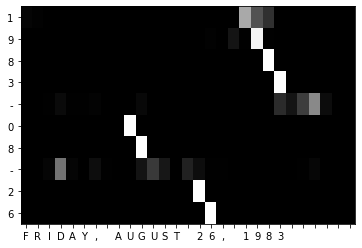

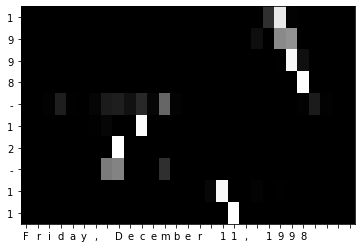

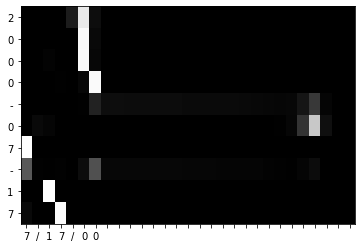

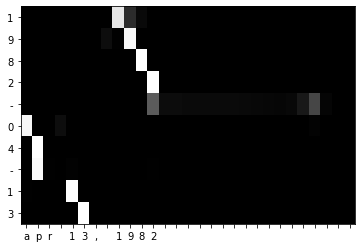

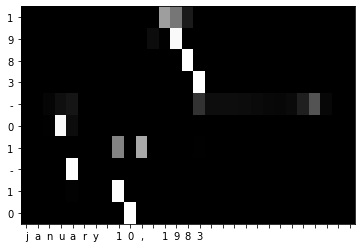

In [28]:

np.random.seed(1984)
for _ in range(5):
    idx = [np.random.randint(0, len(x_test))]
    x = x_test[idx]
    t = t_test[idx]

    model.forward(x, t)
    d = model.decoder.attention.attention_weights
    d = np.array(d)
    attention_map = d.reshape(d.shape[0], d.shape[2])

    # 출력하기 위해 반전
    attention_map = attention_map[:,::-1]
    x = x[:,::-1]

    row_labels = [id_to_char[i] for i in x[0]]
    column_labels = [id_to_char[i] for i in t[0]]
    column_labels = column_labels[1:]

    visualize(attention_map, row_labels, column_labels)


In [29]:
# skip connection : 계층을 넘어 선을 연결하는 단순한 기법 , 덧셈은 역전파 시 기울기를 그대로 흘려보내므로 skip연결의 기울기가 아무런 영향을 받지않고 모든 계층으로 흐름
# 층이 깊어져도 기울기가 소실(폭발)되지 않고 전파되어 결과적으로 좋은 학습을 기대
# rnn 계층의 역전파에는 시간 방향에서 기울기 소실혹은 폭발이 일어날 수 있음
# 기울기 소실: LSTM GRU등의 게이트가 달린 RNN으로 대응
# 기울기 폭발 : 기울기 클리밍으로 대응
# RNN의 깊이 방향 기울기 소실에는 SKIP CONNECTION이 효과적


In [ ]:
# 어텐션 응용
# 1. GNMT(구글 신경망 기계번역) : 2016년부터 구글에서 수행중
# 2. 트랜스포머
# 3. NMT(뉴럴 튜링머신) : 외부 메모리를 통한 확장 , Encoder가 필요한 정보를 메모리에 쓰고, decoder는 그 메모리로부터 필요한 정보를 읽어 들임/ 딥마인드에서 진행한 연구

# Appendix 

In [30]:
# wordnet
!pip install nltk

In [35]:
# nltk는 자연어 처리를 위한 파이썬 라이브러리, 품사태깅, 구문분석, 정보추출, 의미분석 등 자연어 처리에 사용하는 편리한 기능을 많이 제공함
nltk.download('wordnet')
import nltk

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [36]:
from nltk.corpus import wordnet

In [38]:
# car의 동의어 찾기
# wordnet에는 각 단어가 synset이라는 동의어 그룹으로 분류됨
wordnet.synsets('car')


[Synset('car.n.01'),
 Synset('car.n.02'),
 Synset('car.n.03'),
 Synset('car.n.04'),
 Synset('cable_car.n.01')]

In [39]:
car = wordnet.synset('car.n.01')

In [40]:
car.definition()

'a motor vehicle with four wheels; usually propelled by an internal combustion engine'

In [41]:
car.lemma_names() # 동의어 그룹에 속하는 단어들의 이름을 얻을 수 있음

['car', 'auto', 'automobile', 'machine', 'motorcar']

In [42]:
# wordnet과 단어 네트워크
car.hypernym_paths()[0] # 다른 단어와의 의미적인 상하관계
# hypernym: 상위어라는 의미

[Synset('entity.n.01'),
 Synset('physical_entity.n.01'),
 Synset('object.n.01'),
 Synset('whole.n.02'),
 Synset('artifact.n.01'),
 Synset('instrumentality.n.03'),
 Synset('container.n.01'),
 Synset('wheeled_vehicle.n.01'),
 Synset('self-propelled_vehicle.n.01'),
 Synset('motor_vehicle.n.01'),
 Synset('car.n.01')]

In [43]:
# wordnet을 사용한 의미유사도
# 단어사이의 유사도는 path_similarity() 메서드로 구함
# car - novel - dog -  motorcycle 
car = wordnet.synset('car.n.01')
novel = wordnet.synset('novel.n.01')
dog = wordnet.synset('dog.n.01')
motorcycle = wordnet.synset('motorcycle.n.01') 


In [44]:
car.path_similarity(novel)

0.05555555555555555

In [45]:
car.path_similarity(dog)

0.07692307692307693

In [46]:
car.path_similarity(motorcycle)

0.3333333333333333

In [ ]:
### GRU 구현하기 ####
# 게이트를 사용한다는 개념은 유지한채 매개변수를 줄여 계산 시간을 줄임
# LSTM을 더 단순하게 만든 아키텍처
# LSTM보다 계산비용을 줄이고 매개변수 수도 줄임
# GRU 는 LSTM의 기억셀을 사용하지 않음
# r,z라는 2개의 게이트를 사용함
# r: reset게이트,  과거 은닉상태를 얼마나 무시할지를 정함 
# z : update게이트 , 은닉상태를 갱신하는 게이트 / lstm의 forget+input게이트의 두가지 역할을 혼자 담당함